In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
np.random.seed(0)
m=100 # creating 100 samples
X=np.linspace(0,10,m).reshape(m,1)
Y=X+np.random.randn(m,1)

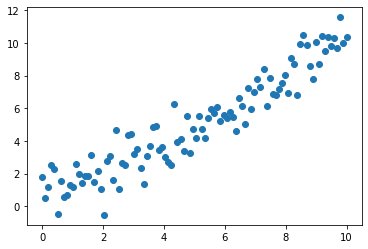

In [9]:
plt.scatter(X,Y)
plt.show()

# Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression

In [12]:
model=LinearRegression()#Least Square method
model.fit(X,Y)

LinearRegression()

R-squared (R2 or the coefficient of determination) : X explains ..% of Y

In [13]:
model.score(X,Y)

0.8881140743377214

In [14]:
predictions=model.predict(X)

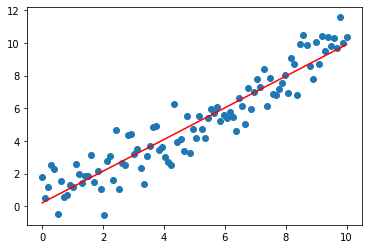

In [15]:
plt.scatter(X,Y)
plt.plot(X,predictions, c='r')
plt.show()

# Classification with Scikit-learn: titanic survivors

In [16]:
titanic=sns.load_dataset('titanic')
titanic.shape

(891, 15)

In [17]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [19]:
titanic=titanic[['survived','pclass','sex','age']]
titanic.dropna(axis=0,inplace=True)#Remove missing values.
titanic['sex'].replace(['male','female'],[0,1],inplace=True)
titanic.head()

/Users/steven/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/Users/steven/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
model2=KNeighborsClassifier()

In [23]:
Y=titanic['survived']
X=titanic.drop('survived',axis=1)

In [24]:
model2.fit(X,Y)

KNeighborsClassifier()

In [26]:
model2.score(X,Y)

0.8319327731092437

In [30]:
model2.predict(X)

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,

In [32]:
def survie(model, pclass,sex,age):
    x=np.array([pclass,sex,age]).reshape(1,3)
    print(model.predict(x))

In [33]:
survie(model2,3,0,25)

[0]


# Scikit_learn split dataset : Iris dataset

In [34]:
from sklearn.datasets import load_iris

In [35]:
iris = load_iris()

(150, 4)


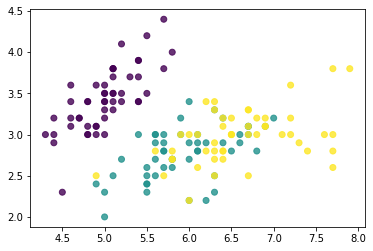

In [38]:
X=iris.data
Y=iris.target
print(X.shape)
plt.scatter(X[:,0], X[:,1],c=Y,alpha=0.8)
plt.show()

In [39]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size= 0.2)
print('train_set' , X_train.shape)
print('test_set', X_test.shape)

train_set (120, 4)
test_set (30, 4)


Text(0.5, 1.0, 'test set')

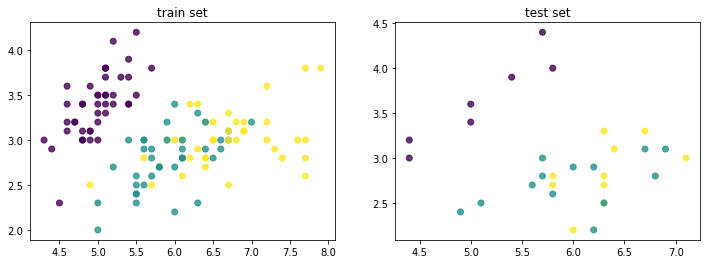

In [45]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.scatter(X_train[:,0], X_train[:,1], c=Y_train, alpha=0.8)
plt.title('train set')

plt.subplot(122)
plt.scatter(X_test[:,0], X_test[:,1], c=Y_test, alpha=0.8)
plt.title('test set')

In [46]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size= 0.2,random_state=5)

In [49]:
model3=KNeighborsClassifier(n_neighbors=3)
model3.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [51]:
print('train_set score' , model3.score(X_train,Y_train))
print('test_set score', model3.score(X_test,Y_test))

train_set score 0.975
test_set score 0.9333333333333333


In [52]:
from sklearn.model_selection import cross_val_score

In [53]:
cross_val_score(KNeighborsClassifier(),X_train,Y_train,cv=5,scoring='accuracy')

array([1.        , 1.        , 1.        , 0.95833333, 0.95833333])

In [54]:
cross_val_score(KNeighborsClassifier(),X_train,Y_train,cv=5,scoring='accuracy').mean()

0.9833333333333334

In [58]:
val_score=[]
for k in range(1, 50):
    val_score.append(cross_val_score(KNeighborsClassifier(k),X_train,Y_train,cv=5,scoring='accuracy').mean())

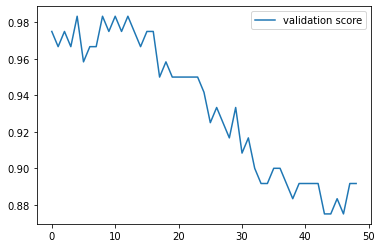

In [59]:
plt.plot(val_score,label='validation score')
plt.legend()
plt.show()

In [61]:
from sklearn.model_selection import validation_curve

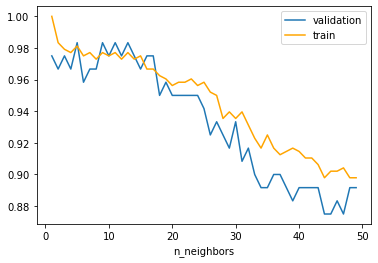

In [64]:
model=KNeighborsClassifier()
k=np.arange(1,50) 
train_scores, val_scores=validation_curve (model,X_train, Y_train, param_name='n_neighbors', param_range=k, cv=5) 
plt.plot(k, val_scores.mean(axis=1), label='validation') 
plt.plot(k, train_scores.mean(axis=1),c='orange', label='train') 
plt.xlabel('n_neighbors') 
plt.legend()
plt.show()

Validation curve :

Ideally, we would want both the validation curve and the training curve to look as similar
as possible.

▶ Underfitting: Accuracy scores of both train and validation sets are low. 
This indicates that the model is too simple or has been regularized too much.

▶ Overfitting: The training accuracy score is very high and the accuracy score of the validation set is low.
The model fits very well for the training data, but it fails to generalize to new input data.

▶ Just-right: No overfitting or underfitting

In [65]:
from sklearn.model_selection import GridSearchCV

In [68]:
param_grid={'n_neighbors':np.arange(1,20),'metric':['euclidean','manhattan']}
grid=GridSearchCV(KNeighborsClassifier(),param_grid,cv=5)
model=grid.fit(X_train,Y_train)

In [69]:
grid.best_estimator_

KNeighborsClassifier(metric='euclidean')

In [70]:
grid.best_score_

0.9833333333333334

In [71]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 5}